<a href="https://colab.research.google.com/github/ThiagoGuerra09/Classification_tree/blob/main/Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio


# Nova seção

In [1]:
!pip -q install plotly --upgrade

     |████████████████████████████████| 15.2 MB 172 kB/s 
ERROR: Operation cancelled by user


# Base de dados


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pydot
import pydotplus


# Importando arquivo





In [3]:
base=pd.read_csv('/content/sample_data/Restaurante.csv', ';' ,encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,10-30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,10-30,Não


In [5]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()                    
base=base.apply(string_to_int.fit_transform) 
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,1,0,0,1,0,2,0,1,0,0,1
1,1,0,0,1,1,0,0,0,3,2,0
2,0,1,0,0,0,0,0,0,1,0,1
3,1,0,1,1,1,0,1,0,3,1,1
4,1,0,1,0,1,2,0,1,0,3,0
5,0,1,0,1,0,1,1,1,2,0,1
6,0,1,0,0,2,0,1,0,1,0,0
7,0,0,0,1,0,1,1,1,3,0,1
8,0,1,1,0,1,0,1,0,1,3,0
9,1,1,1,1,1,2,0,1,2,1,0


In [6]:
feature_cols = ['Alternativo', 'Bar', 'Sex/Sab', 'fome', 'Cliente', 'Preço', 'Chuva', 'Res', 'Tipo', 'Tempo']
x = base[feature_cols ]                               #contains the attribute 
y = base.conc


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [33]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)     # create a classifier object
classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred= classifier.predict(x_test)


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
accuracy_score(y_test, y_pred)

0.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.0

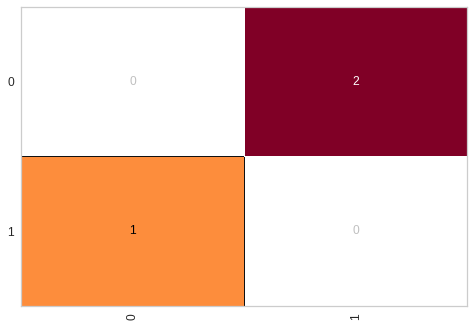

In [40]:
from yellowbrick.classifier import ConfusionMatrix # Importando biblioteca de matriz de confusão
confusion_matrix(y_test, y_pred)

cm = ConfusionMatrix(classifier) # Matriz de Confusão Visualmente
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



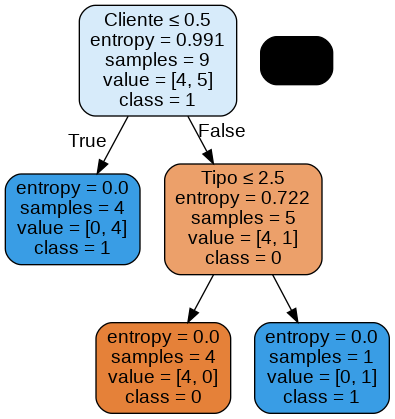

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Restaurante.png')
Image(graph.create_png())